In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
%matplotlib inline

student_mat = pd.read_csv('Downloads/student-mat.csv')
student_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [46]:
student_mat.groupby("sex").aggregate({"G1": [np.mean, np.std, np.size]})

G1               
          mean       std size
sex                          
F    10.620192  3.232530  208
M    11.229947  3.392839  187

In [47]:
mean_f = 10.620192
std_f = 3.232530
n_female = 208
z = 1.96

stderr_female = std_f/np.sqrt(mean_f)
print("Standard error mean of female G1:",stderr_female)

Standard error mean of female G1: 0.9919193900691876


In [48]:
lcb = mean_f - z* stderr_female
ucb = mean_f + z* stderr_female
print('lcb female:', lcb)
print('ucb female:', ucb)

lcb female: 8.676029995464392
ucb female: 12.564354004535607


Text(10.049999999999997, 0.5, 'Number of Student')

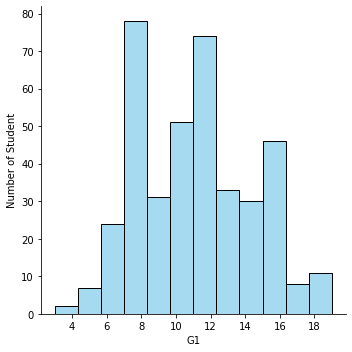

In [49]:
sns.displot (student_mat ["G1"], color='skyblue')
plt.ylabel('Number of Student')

In [57]:
# Normality Test

from scipy.stats import shapiro
stat, p = shapiro(student_mat['G2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.969, p=0.000
Probably not Gaussian


In [71]:
# Correlation Test : continous

from scipy.stats import pearsonr
data_1 = student_mat['G1']
data_2 = student_mat['G2']
stat, p = pearsonr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably not independent')

stat=0.852, p=0.000
Probably not independent


In [72]:
# Correlation Test : Categorical

from scipy.stats import chi2_contingency
data_1 = student_mat['G1']
data_2 = student_mat['G2']
stat, p = pearsonr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably not independent')

stat=0.852, p=0.000
Probably not independent


In [73]:
# Student-t Test

from scipy.stats import ttest_rel
data_1 = student_mat['G1']
data_2 = student_mat['G2']
stat, p = ttest_rel(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably same distribution')
else:
    print('Probably not same distribution')

stat=1.965, p=0.050
Probably same distribution
